In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from matplotlib.gridspec import GridSpec
from xgboost import XGBRFClassifier,XGBClassifier

%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\ROG\Desktop\Project\LOL Data Analysis\dataset\high_diamond_ranked_10min.csv")
df.head(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
df.drop('gameId',axis=1,inplace=True)
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [6]:
df_all=df.copy()

In [7]:
df_features=df[['blueWins','blueWardsPlaced','blueWardsDestroyed','blueFirstBlood','blueKills','blueDeaths','blueAssists','blueDragons','blueHeralds','blueTowersDestroyed','blueTotalMinionsKilled','blueTotalMinionsKilled','redWardsPlaced','redWardsDestroyed','redFirstBlood','redKills','redDeaths','redAssists','redDragons','redHeralds','redTowersDestroyed','redTotalMinionsKilled','redTotalJungleMinionsKilled']]
df_features.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,...,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,...,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,...,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,...,2,1,6,6,7,1,0,0,225,67


In [8]:
def corr_heatmap(df, digits=2):
    cr=df.corr().round(digits)
    cr
    mask=np.zeros_like(cr)
    mask[np.triu_indices_from(mask)]=True
    fig,ax=plt.subplots(figsize=((len(df.columns)),(len(df.columns))))
    sns.heatmap(cr,annot=True, ax=ax, vmin=-1,vmax=1,mask=mask);
    return fig, ax

In [9]:
def visual(df, target, col):
    data=df[col].copy()
    name=col
    median= data.median().round(2)
    mean=data.mean().round(2)
    fig = plt.figure(figsize=(11,6))
    gs= GridSpec(nrows=2, ncols=2)
    
    ax0=fig.add_subplot(gs[0,0])
    ax1=fig.add_subplot(gs[1,0])
    ax2=fig.add_subplot(gs[:,1])
    
    sns.histplot(data,ax=ax0)
    sns.kdeplot(data, label='KDE', ax=ax0)
    ax0.set(ylabel='Density',title=name)
    ax0.set_title("Distribution")
    ax0.axvline(median,label='median',color='black')
    ax0.axvline(mean,label='mean')
    ax0.legend()
    
    sns.boxplot(data,x=col,ax=ax1)
    ax1.set_title("Boxplot")
    
    sns.regplot(data=df,x=col,y=target,ax=ax2)
    
    fig.tight_layout()
    
    return fig,gs

(<Figure size 2808x2808 with 2 Axes>, <AxesSubplot:>)

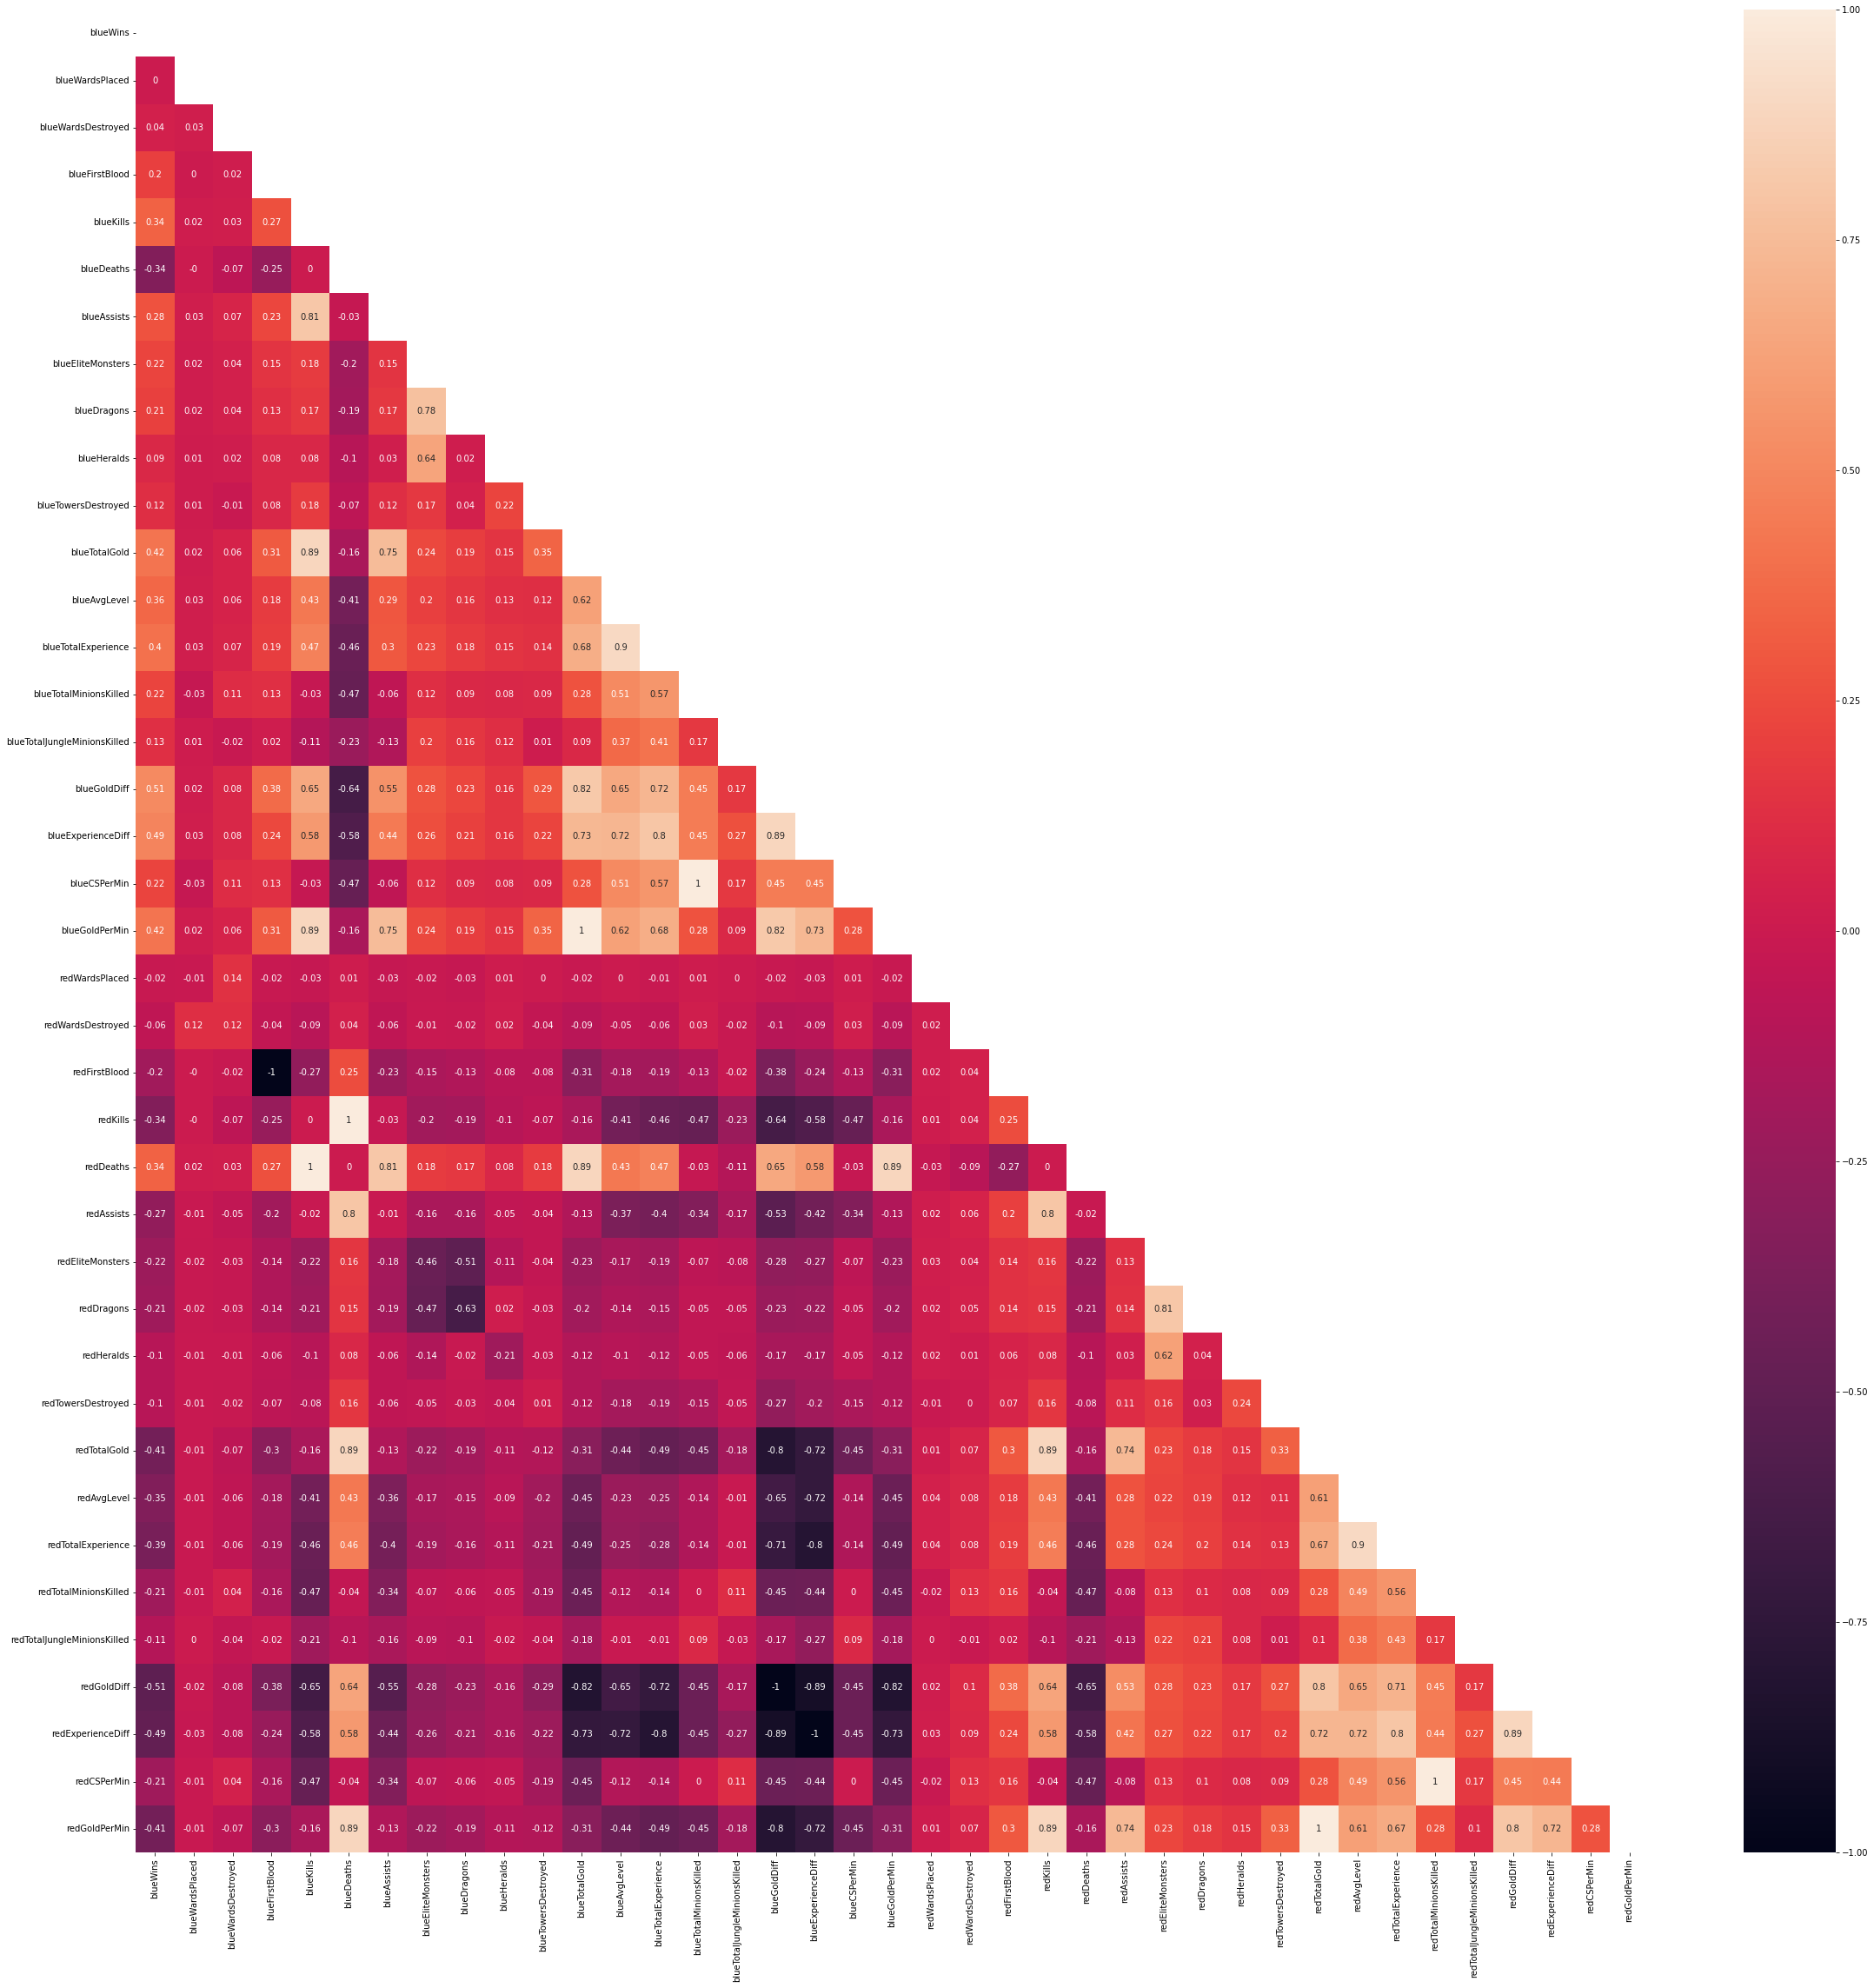

In [10]:
corr_heatmap(df_all)

(<Figure size 1656x1656 with 2 Axes>, <AxesSubplot:>)

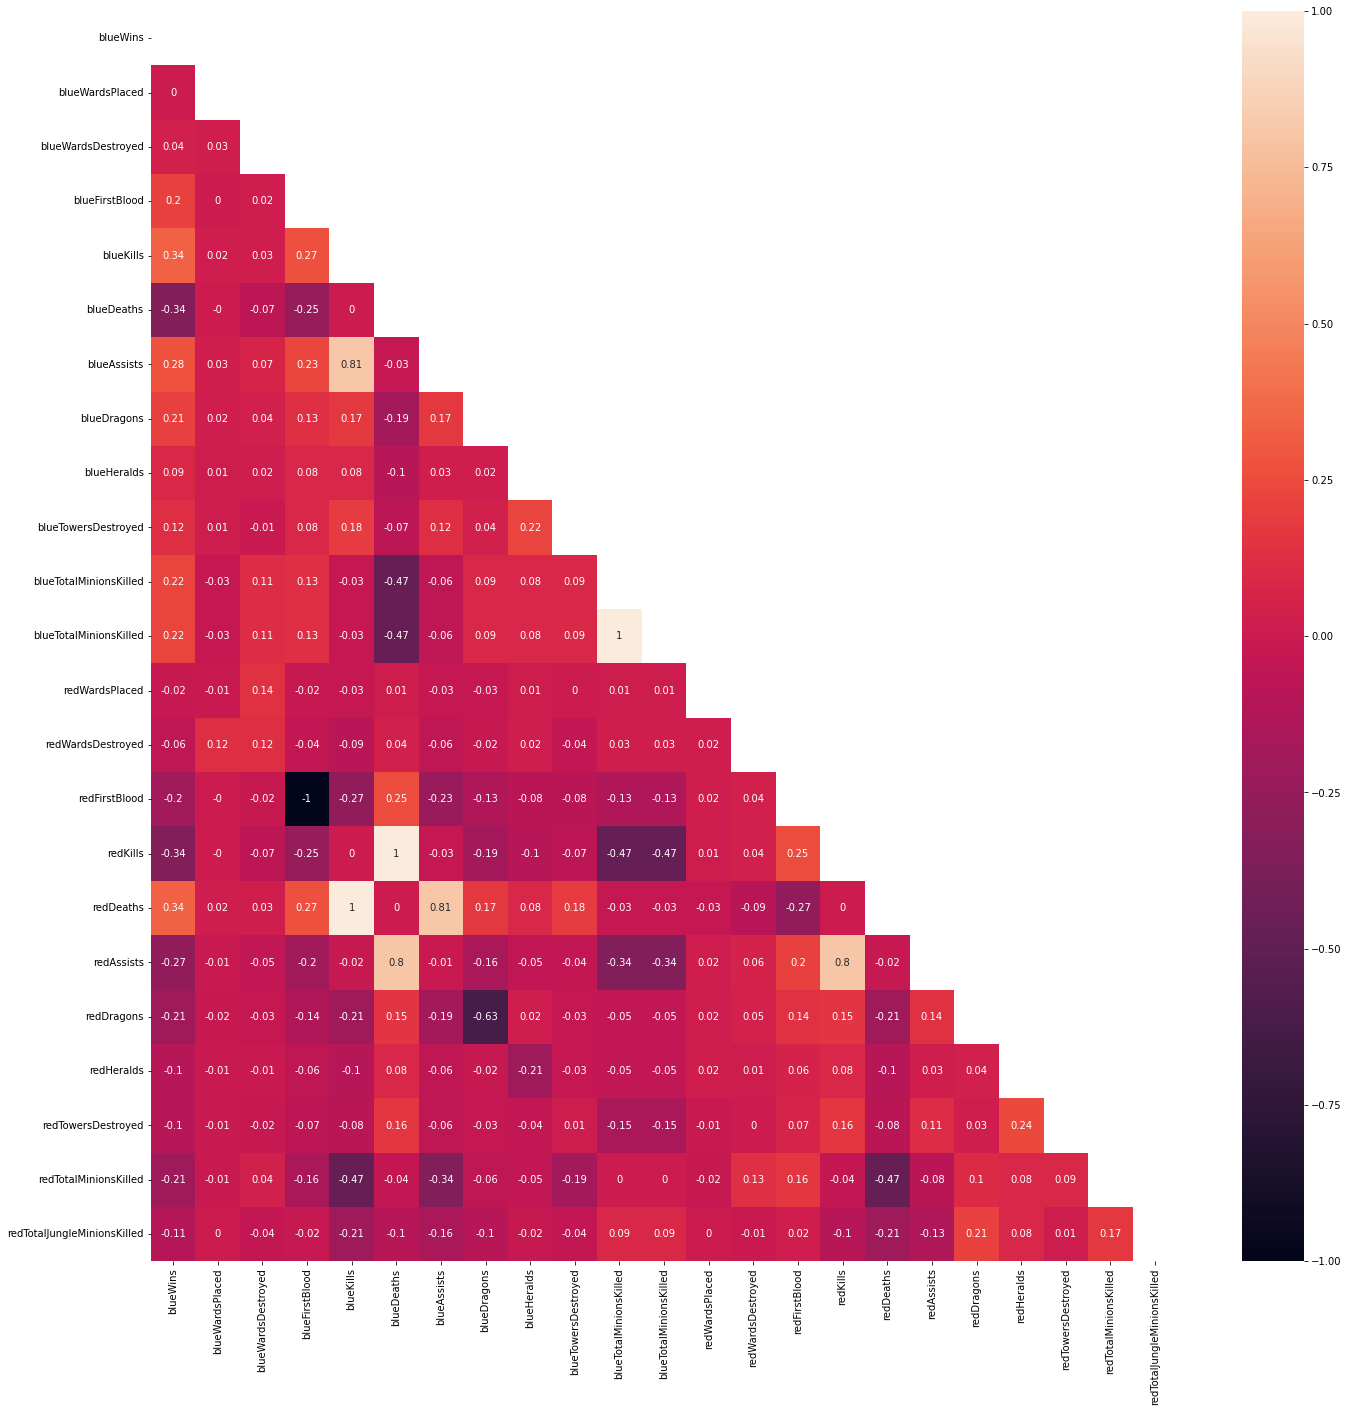

In [11]:
corr_heatmap(df_features)

In [12]:
df_features.drop(columns=['redKills','redDeaths','redFirstBlood'],inplace=True)
df_features.columns 

C:\Users\ROG\AppData\Local\Temp\ipykernel_16936\748296136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.drop(columns=['redKills','redDeaths','redFirstBlood'],inplace=True)


Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

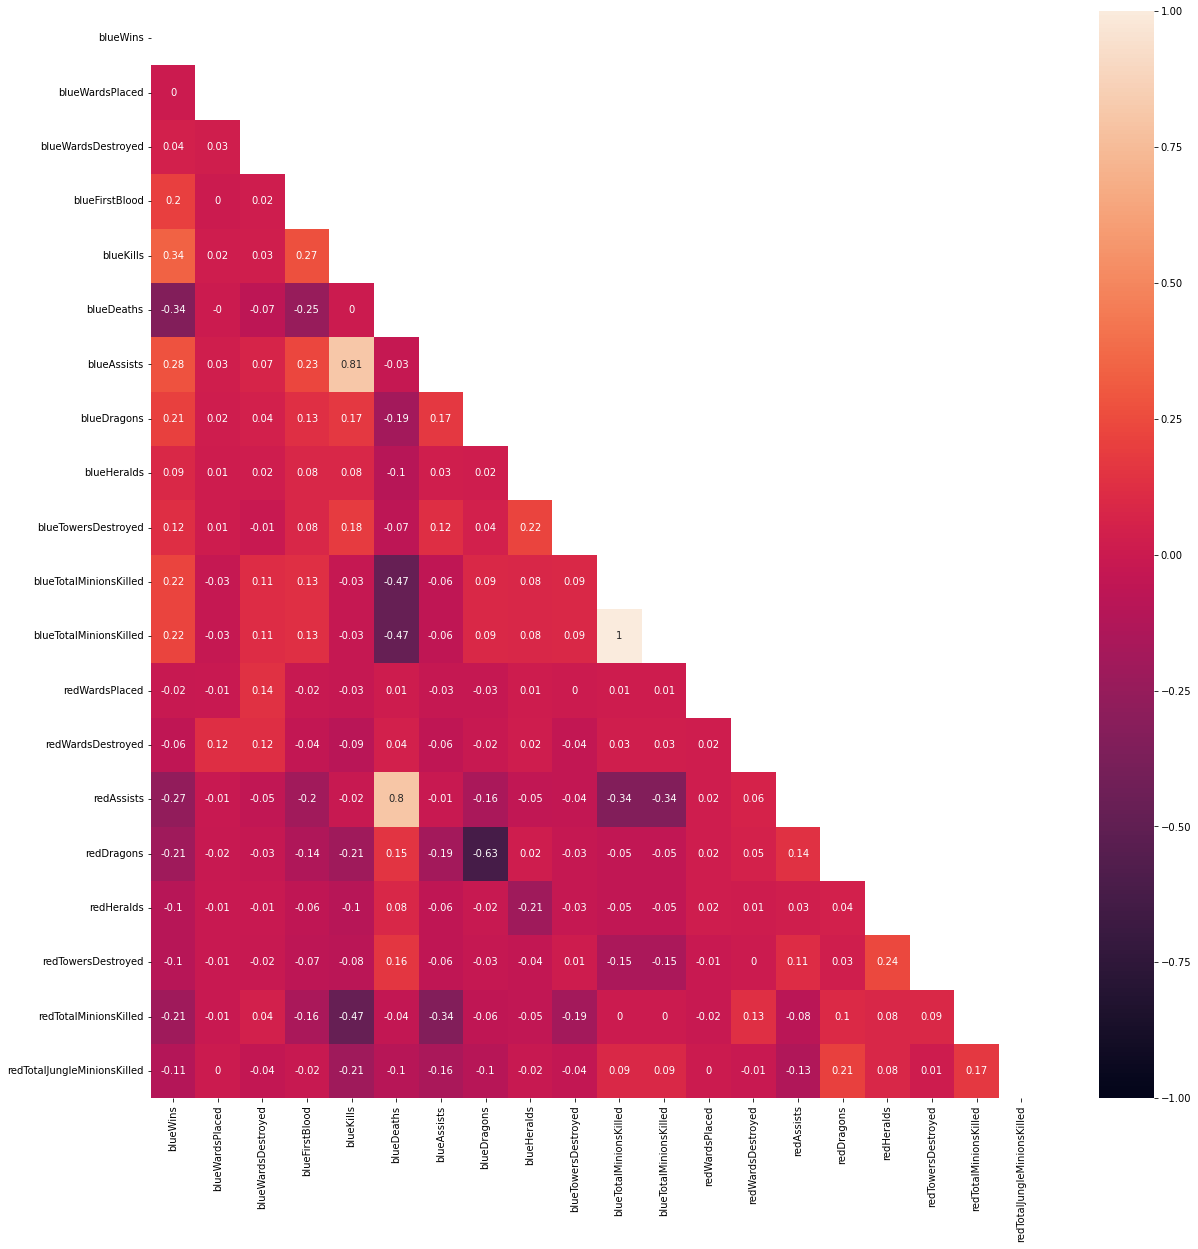

In [13]:
corr_heatmap(df_features)

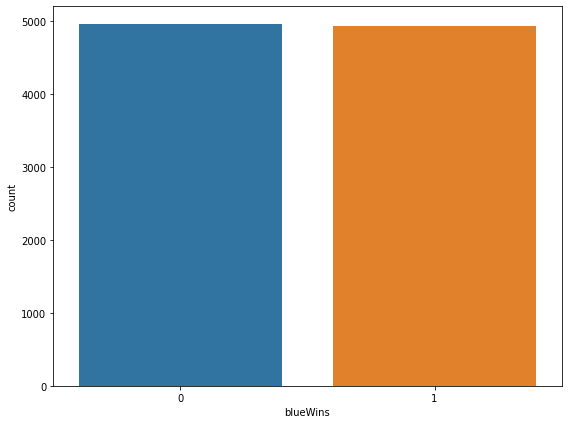

In [14]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='blueWins',data=df_features)

plt.tight_layout()

C:\Users\ROG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


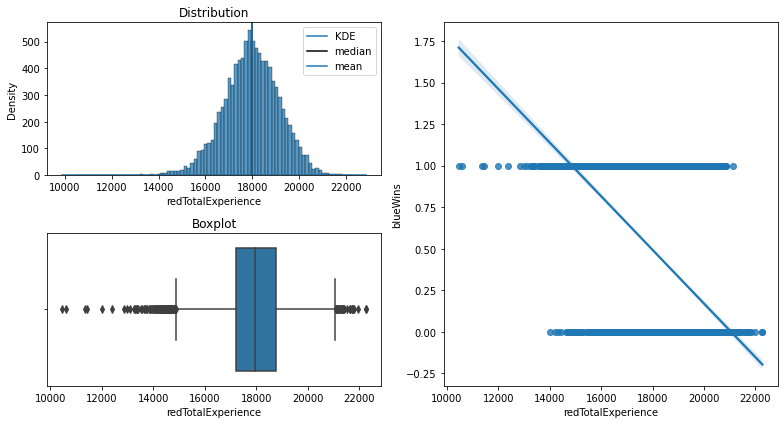

In [15]:
visual(df_all, 'blueWins', 'redTotalExperience');

C:\Users\ROG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<Figure size 792x432 with 3 Axes>, GridSpec(2, 2))

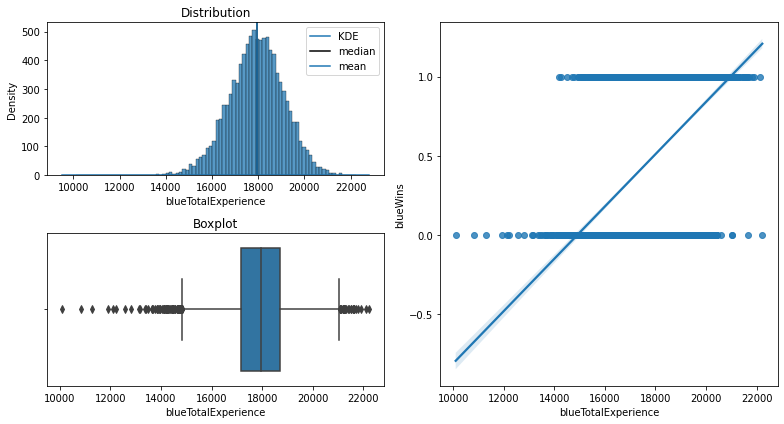

In [16]:
visual(df_all, 'blueWins', 'blueTotalExperience')

C:\Users\ROG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<Figure size 792x432 with 3 Axes>, GridSpec(2, 2))

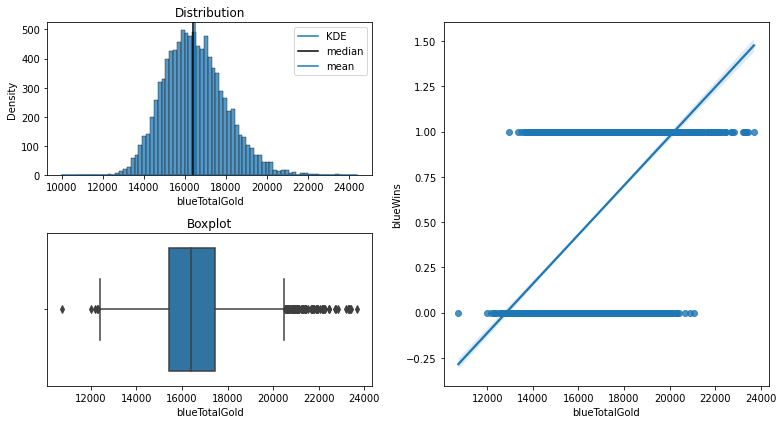

In [19]:
visual(df_all, 'blueWins', 'blueTotalGold')

C:\Users\ROG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<Figure size 792x432 with 3 Axes>, GridSpec(2, 2))

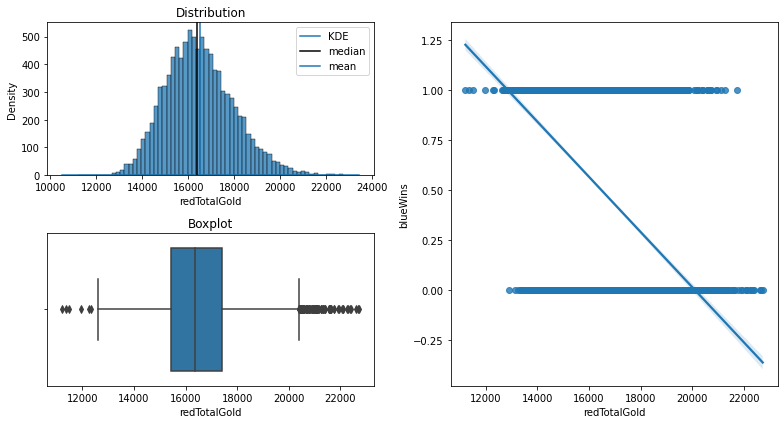

In [21]:
visual(df_all, 'blueWins', 'redTotalGold')


In [26]:
def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False): 
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    print("TRAINING DATA")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("TEST DATA")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("CONFUSION MATRIX AND ROC-AUC VISUALIZATION")

    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=figsize)
    
    # Confusion Matrix
    metrics.plot_confusion_matrix(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    # Plot ROC Curve
    metrics.plot_roc_curve(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("MODEL PARAMETERS")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

    

In [27]:
def split_scale(df, target, scaler=StandardScaler()):
    
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # Get list of column names
    cols = X_train.columns
    
    # Scale columns
    scaler = scaler
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
    
    return X_train, X_test, y_train, y_test


def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):

    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model
# Create training and test data splits.
X_train_select, X_test_select, y_train_select, \
                y_test_select = split_scale(df_features, 'blueWins')
X_train_big, X_test_big, y_train_big, \
             y_test_big = split_scale(df_all, 'blueWins')

TRAINING DATA
              precision    recall  f1-score   support

           0     0.7221    0.7223    0.7222      3713
           1     0.7210    0.7208    0.7209      3696

    accuracy                         0.7216      7409
   macro avg     0.7216    0.7216    0.7216      7409
weighted avg     0.7216    0.7216    0.7216      7409

TEST DATA
              precision    recall  f1-score   support

           0     0.7164    0.7193    0.7178      1236
           1     0.7177    0.7147    0.7162      1234

    accuracy                         0.7170      2470
   macro avg     0.7170    0.7170    0.7170      2470
weighted avg     0.7170    0.7170    0.7170      2470

CONFUSION MATRIX AND ROC-AUC VISUALIZATION


C:\Users\ROG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ROG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


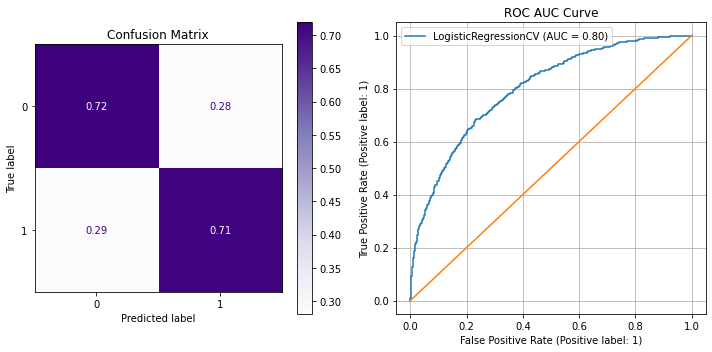

In [25]:
log_select = fit_eval(LogisticRegressionCV(random_state=42),X_train_select, y_train_select,X_test_select, y_test_select)